# Ejmplo perceptron multicapa para clasificacion
### Examen Mayo 2024


## Librerias y carga del dataset

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Cargar datos
df = pd.read_csv('mushroom.csv')

## Limpieza de los Datos con Funcion

In [2]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

def clean_and_split2(df: pd.DataFrame,
                    col_objetivo: str,
                    test_size: float = 0.2,
                    random_state: int = 13):
    
    # Contar NaNs antes de limpiar
    nan_counts_before = df.isna().sum()  # cuenta de valores faltantes por col
    print("Valores faltantes antes de la limpieza:\n", nan_counts_before)

    # Se eliminan todas las filas que contienen al menos un valor nulo
    #df = df.dropna(how='any') 
    
    # 1. Extraer la col objetivo del resto de las características del DF, separar X e y
    y = df[col_objetivo].values  # objetivo como array numpy
    X = df.drop(columns=[col_objetivo])  # elimina la col objetivo

    # 2. Separar entre columnas numéricas y categoricas
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    categoric_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # 3. Definir pipeline para porcesar cols numericas
    # Vamos a quitar los NaN y una normalizacion a 0-1
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # sustituye NaN por media
        ('scaler', MinMaxScaler())  # normaliza valores al rango [0,1]
    ])

    # 4. Definir pipeline para porcesar cols categoricas
    # Vamos a quitar los NaN y hacer codificaion OneHot
    categoric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),  # sustituye NaN por moda
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # codifica categorias, OneHot
    ])

    # 5. Combinar los pipelines en el prepocesor
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_pipeline, numeric_cols),  # aplica a num_cols
        ('cat', categoric_pipeline, categoric_cols)   # aplica a cat_cols
    ])

    # 6. Ajustar transformaciones y transformar datos
    X_processed = preprocessor.fit_transform(X)

    # Contar NaNs despues de la limpieza (ya no deberia haber)
    # DataFrame temporal para comprobalo
    nuevo_df = pd.DataFrame(X_processed)
    nan_cont_desp = nuevo_df.isna().sum()
    print("Valores faltantes después de la limpieza:\n", nan_cont_desp)

    # 7. Division en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y,
        test_size=test_size,
        random_state=random_state
    )

    return X_train, X_test, y_train, y_test



#Utilizamos la funcion para obtener los datos de entrenamiento y test
col_objetivo = "class"
X_train, X_test, y_train, y_test = clean_and_split2(df, col_objetivo)
print("Train shape:", X_train.shape)
print("Test  shape:", X_test.shape)


Valores faltantes antes de la limpieza:
 cap-diameter       2
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         2
stem-color         0
season             0
class              0
dtype: int64
Valores faltantes después de la limpieza:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
Train shape: (43228, 8)
Test  shape: (10807, 8)


# Decision Tree o Binary Tree

In [ ]:
# Árbol de Decisión Binario
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instanciar Decision Tree con profundidad máxima de 19 (ajusta si hace falta)
clf = DecisionTreeClassifier(max_depth=19, random_state=13)

# Entrenar modelo
clf.fit(X_train, y_train)

# Predecir sobre el conjunto de test
y_predict_DT = clf.predict(X_test)

# Calcular accuracy
ac = accuracy_score(y_predict_DT, y_test)
print("Accuracy Decision Tree:", ac)

Accuracy Decision Tree: 0.9769593781808087


# Decision Tree o Binary Tree

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir Decision Tree base
dt = DecisionTreeClassifier(random_state=13)

# Rejilla de hiperparámetros
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 19, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Ejecutar búsqueda de hiperparámetros
grid_search_dt.fit(X_train, y_train)

# Resultados de validación cruzada
print("Mejores parámetros DT:", grid_search_dt.best_params_)
print("Mejor score CV DT:", grid_search_dt.best_score_)

# Evaluar en test con el mejor estimador
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
test_acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy DT en test:", test_acc_dt)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Mejores parámetros DT: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor score CV DT: 0.9783011283613934
Accuracy DT en test: 0.9782548348292773


## Mostrar resultados:
### Matriz de Confusion

Matriz de confusion Decision Tree:
[[4750  123]
 [ 126 5808]]


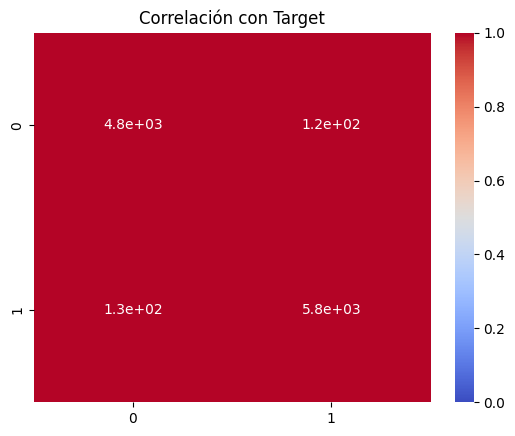


Falsos positivos Decision Tree: 123

Falsos negativos Decision Tree: 126

Accuracy 0.9769593781808087

precision_score 0.9792615073343449

recall_score 0.9787664307381193

f1_score 0.9790139064475347


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_DT = confusion_matrix(y_test, y_predict_DT)
print("Matriz de confusion Decision Tree:")
print(cm_DT)


#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# Dibujar mapa de calor
sns.heatmap(cm_DT, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlación con Target')
plt.show()
# (0,0) TN: Verdaderos negativos
# (0,1) FP: Falsos positivos (¡esto es lo que quieres!)
# (1,0) FN: Falsos negativos
# (1,1) TP: Verdaderos positivos

fp_knn = cm_DT[0, 1]
fn_knn = cm_DT[1, 0]
print("\nFalsos positivos Decision Tree:", fp_knn)
print("\nFalsos negativos Decision Tree:", fn_knn)

'''
Cuándo priorizar cada una:

    Si te preocupan FP (falsos positivos), examina precision.

    Si temes mas FN (falsos negativos), mira recall.

    El F1-score equilibra ambas.
'''
acc = accuracy_score(y_test, y_predict_DT)
print("\nAccuracy",ac) #ya lo muestro antes al hacer el modelo
prec = precision_score(y_test, y_predict_DT)
print("\nprecision_score",prec)
rec = recall_score(y_test, y_predict_DT)
print("\nrecall_score",rec)
f1 = f1_score(y_test, y_predict_DT)
print("\nf1_score",f1)